# Installation

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

In [ ]:
!java -version

openjdk version "1.8.0_275"
OpenJDK Runtime Environment (build 1.8.0_275-8u275-b01-0ubuntu1~18.04-b01)
OpenJDK 64-Bit Server VM (build 25.275-b01, mixed mode)


In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
appdirs                       1.4.4          
argon2-cffi                   20.1.0         
asgiref                       3.3.1          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.3.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.9.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.2.

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

In [ ]:
# Check the pyspark version
import findspark
print(findspark.__version__)

1.4.2


In [ ]:
import findspark
findspark.init()

In [ ]:
# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.0.1


# Initialize Spark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
spark

# Retrieve data

In [ ]:
!wget -O "data-covid-june-2020.csv" "https://data.jakarta.go.id/dataset/345150fd-b5e0-419d-bbd4-bce2ff52bf30/resource/127c4006-8eb5-43f9-abfb-06a8c2388a2e/download/Data-ODP-PDP-dan-Positif-Covid-19-DKI-Jakarta-Per-Kecamatan-Bulan-Juni-2020.csv"

--2021-02-03 15:42:25--  https://data.jakarta.go.id/dataset/345150fd-b5e0-419d-bbd4-bce2ff52bf30/resource/127c4006-8eb5-43f9-abfb-06a8c2388a2e/download/Data-ODP-PDP-dan-Positif-Covid-19-DKI-Jakarta-Per-Kecamatan-Bulan-Juni-2020.csv
Resolving data.jakarta.go.id (data.jakarta.go.id)... 103.209.7.34
Connecting to data.jakarta.go.id (data.jakarta.go.id)|103.209.7.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5745 (5.6K) [text/x-comma-separated-values]
Saving to: ‘data-covid-june-2020.csv’

data-covid-june-202 100%[===================>]   5.61K  --.-KB/s    in 0s      

2021-02-03 15:42:26 (94.1 MB/s) - ‘data-covid-june-2020.csv’ saved [5745/5745]



In [ ]:
# RDD
raw_content = spark.sparkContext.textFile('data-covid-june-2020.csv')

In [ ]:
type(raw_content)

pyspark.rdd.RDD

In [ ]:
# count data
raw_content.count()

107

In [ ]:
raw_content.take(10)

['tanggal,kecamatan,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,isolasi_mandiri',
 '2020-06-01,BELUM DIKETAHUI,4534,308,4226,3315,608,2707,623,170,29,5,419',
 '2020-06-01,CAKUNG,415,7,408,112,6,106,124,32,39,9,44',
 '2020-06-01,CEMPAKA PUTIH,761,6,755,192,7,185,94,20,46,7,21',
 '2020-06-01,CENGKARENG,638,3,635,99,17,82,139,36,39,11,53',
 '2020-06-01,CILANDAK,474,1,473,180,9,171,94,15,45,14,20',
 '2020-06-01,CILINCING,767,18,749,106,15,91,103,22,17,8,56',
 '2020-06-01,CIPAYUNG,360,5,355,108,6,102,69,19,26,1,23',
 '2020-06-01,CIRACAS,405,6,399,89,4,85,63,17,21,8,17',
 '2020-06-01,DUREN SAWIT,816,14,802,153,2,151,255,44,81,25,105']

In [ ]:
# Split the data by comma (original data was csv)
content = raw_content.map(lambda x: x.split(','))

In [ ]:
content.take(5)

[['tanggal',
  'kecamatan',
  'odp',
  'proses_pemantauan',
  'selesai_pemantauan',
  'pdp',
  'masih_dirawat',
  'pulang_dan_sehat',
  'positif',
  'dirawat',
  'sembuh',
  'meninggal',
  'isolasi_mandiri'],
 ['2020-06-01',
  'BELUM DIKETAHUI',
  '4534',
  '308',
  '4226',
  '3315',
  '608',
  '2707',
  '623',
  '170',
  '29',
  '5',
  '419'],
 ['2020-06-01',
  'CAKUNG',
  '415',
  '7',
  '408',
  '112',
  '6',
  '106',
  '124',
  '32',
  '39',
  '9',
  '44'],
 ['2020-06-01',
  'CEMPAKA PUTIH',
  '761',
  '6',
  '755',
  '192',
  '7',
  '185',
  '94',
  '20',
  '46',
  '7',
  '21'],
 ['2020-06-01',
  'CENGKARENG',
  '638',
  '3',
  '635',
  '99',
  '17',
  '82',
  '139',
  '36',
  '39',
  '11',
  '53']]

In [ ]:
def clean(x):
  return([xx.replace('\'', '') for xx in x])

In [ ]:
content = content.map(clean)
content.take(5)

[['tanggal',
  'kecamatan',
  'odp',
  'proses_pemantauan',
  'selesai_pemantauan',
  'pdp',
  'masih_dirawat',
  'pulang_dan_sehat',
  'positif',
  'dirawat',
  'sembuh',
  'meninggal',
  'isolasi_mandiri'],
 ['2020-06-01',
  'BELUM DIKETAHUI',
  '4534',
  '308',
  '4226',
  '3315',
  '608',
  '2707',
  '623',
  '170',
  '29',
  '5',
  '419'],
 ['2020-06-01',
  'CAKUNG',
  '415',
  '7',
  '408',
  '112',
  '6',
  '106',
  '124',
  '32',
  '39',
  '9',
  '44'],
 ['2020-06-01',
  'CEMPAKA PUTIH',
  '761',
  '6',
  '755',
  '192',
  '7',
  '185',
  '94',
  '20',
  '46',
  '7',
  '21'],
 ['2020-06-01',
  'CENGKARENG',
  '638',
  '3',
  '635',
  '99',
  '17',
  '82',
  '139',
  '36',
  '39',
  '11',
  '53']]

In [ ]:
# Create dataframe and visualize it
DT = spark.createDataFrame(
      data=content.filter(lambda x:x[0] != 'tanggal'), 
      schema=content.filter(lambda x:x[0] == 'tanggal').collect()[0])
DT.persist()

DataFrame[tanggal: string, kecamatan: string, odp: string, proses_pemantauan: string, selesai_pemantauan: string, pdp: string, masih_dirawat: string, pulang_dan_sehat: string, positif: string, dirawat: string, sembuh: string, meninggal: string, isolasi_mandiri: string]

In [ ]:
DT.show(n = 10)

+----------+---------------+----+-----------------+------------------+----+-------------+----------------+-------+-------+------+---------+---------------+
|   tanggal|      kecamatan| odp|proses_pemantauan|selesai_pemantauan| pdp|masih_dirawat|pulang_dan_sehat|positif|dirawat|sembuh|meninggal|isolasi_mandiri|
+----------+---------------+----+-----------------+------------------+----+-------------+----------------+-------+-------+------+---------+---------------+
|2020-06-01|BELUM DIKETAHUI|4534|              308|              4226|3315|          608|            2707|    623|    170|    29|        5|            419|
|2020-06-01|         CAKUNG| 415|                7|               408| 112|            6|             106|    124|     32|    39|        9|             44|
|2020-06-01|  CEMPAKA PUTIH| 761|                6|               755| 192|            7|             185|     94|     20|    46|        7|             21|
|2020-06-01|     CENGKARENG| 638|                3|             

In [ ]:
from pyspark.sql.functions import udf

In [ ]:
DT.createOrReplaceTempView('covid')

# Descriptive Analytics

In [ ]:
# Total positive cases in June
query_result = spark.sql("\
                SELECT int(SUM(positif)) AS positive FROM covid \
                ")
query_result.collect()[0]['positive']

14842

In [ ]:
# Top 10 Kecamatan with most positive cases in June
query_result1 = spark.sql("\
                SELECT int(SUM(positif)) AS positive, kecamatan \
                FROM covid \
                WHERE kecamatan != 'LUAR DKI JAKARTA' \
                AND kecamatan != 'BELUM DIKETAHUI' \
                GROUP BY kecamatan \
                ORDER BY int(SUM(positif)) DESC \
                LIMIT 10 \
                ")
result1 = query_result1.collect()

In [ ]:
for data in result1:
  print("Kecamatan: " + data['kecamatan'] + " with: " + str(data['positive']) + " positive cases")

Kecamatan: TANAH ABANG with: 677 positive cases
Kecamatan: TANJUNG PRIOK with: 583 positive cases
Kecamatan: DUREN SAWIT with: 520 positive cases
Kecamatan: PADEMANGAN with: 378 positive cases
Kecamatan: PALMERAH with: 368 positive cases
Kecamatan: KEBON JERUK with: 368 positive cases
Kecamatan: PENJARINGAN with: 365 positive cases
Kecamatan: GROGOL PETAMBURAN with: 325 positive cases
Kecamatan: JATINEGARA with: 298 positive cases
Kecamatan: KRAMAT JATI with: 298 positive cases


In [ ]:
# Top 10 Kecamatan with most death cases in June
query_result2 = spark.sql("\
                SELECT int(SUM(meninggal)) AS deaths, kecamatan \
                FROM covid \
                WHERE kecamatan != 'LUAR DKI JAKARTA' \
                AND kecamatan != 'BELUM DIKETAHUI' \
                GROUP BY kecamatan \
                ORDER BY int(SUM(meninggal)) DESC \
                LIMIT 10 \
                ")

result2 = query_result2.collect()

In [ ]:
for data in result2:
  print("Kecamatan: " + data['kecamatan'] + " with: " + str(data['deaths']) + " deaths")

Kecamatan: TANJUNG PRIOK with: 52 deaths
Kecamatan: DUREN SAWIT with: 50 deaths
Kecamatan: KEBAYORAN LAMA with: 36 deaths
Kecamatan: TANAH ABANG with: 34 deaths
Kecamatan: PESANGGRAHAN with: 32 deaths
Kecamatan: PALMERAH with: 31 deaths
Kecamatan: KEBON JERUK with: 30 deaths
Kecamatan: KEMAYORAN with: 29 deaths
Kecamatan: CILANDAK with: 28 deaths
Kecamatan: KRAMAT JATI with: 28 deaths


In [ ]:
# Correlation between deaths & positive cases
query_result3 = spark.sql("\
                SELECT  int(SUM(meninggal)) AS deaths, \
                        int(SUM(odp)) AS odp, \
                        int(SUM(proses_pemantauan)) AS in_monitor, \
                        int(SUM(selesai_pemantauan)) AS finish_monitor, \
                        int(SUM(pdp)) AS pdp, \
                        int(SUM(masih_dirawat)) AS still_being_treated, \
                        int(SUM(pulang_dan_sehat)) AS recovered_and_return, \
                        int(SUM(positif)) AS positive, \
                        int(SUM(dirawat)) AS treated, \
                        int(SUM(sembuh)) AS recovered, \
                        int(SUM(isolasi_mandiri)) AS self_isolated, \
                        kecamatan \
                FROM covid \
                WHERE kecamatan != 'LUAR DKI JAKARTA' \
                AND kecamatan != 'BELUM DIKETAHUI' \
                AND kecamatan != '' \
                GROUP BY kecamatan \
                ")

result3 = query_result3.collect()

In [ ]:
cases = []

for data in result3:
  cases.append([
                data['deaths'], 
                data['odp'],
                data['in_monitor'],
                data['finish_monitor'],
                data['pdp'],
                data['still_being_treated'],
                data['recovered_and_return'],
                data['positive'],
                data['treated'],
                data['recovered'],
                data['self_isolated'],
                ])

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
type(cases)
df = pd.DataFrame(cases)
df.columns = ['deaths', 
              'odp', 
              'in_monitor', 
              'finish_monitor',
              'pdp',
              'still_being_treated',
              'recovered_and_return',
              'positive',
              'treated',
              'recovered',
              'self_isolated'
              ]

Text(0.5, 1.0, 'Triangle Correlation map for COVID in June')

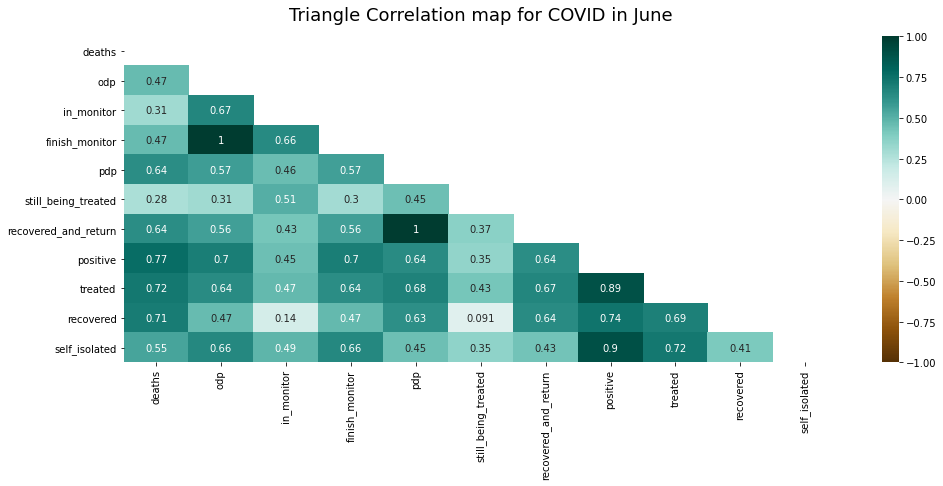

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation map for COVID in June', fontdict={'fontsize':18}, pad=16)

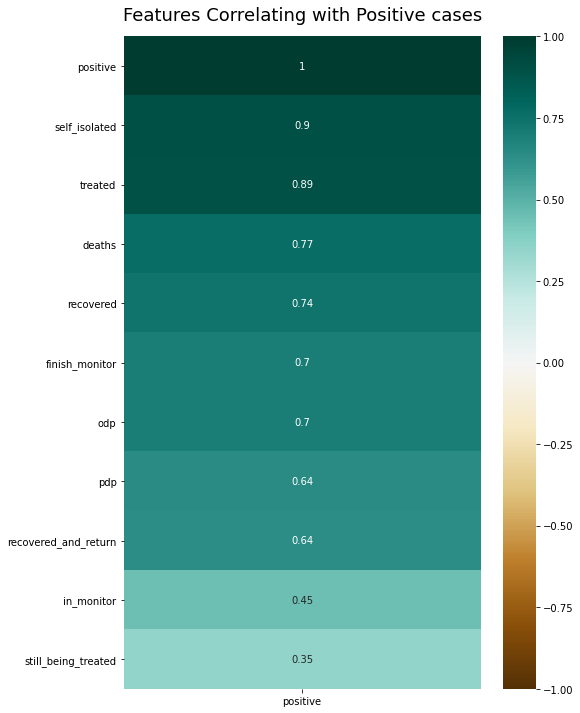

In [ ]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[['positive']].sort_values(by='positive', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Positive cases', fontdict={'fontsize':18}, pad=16);

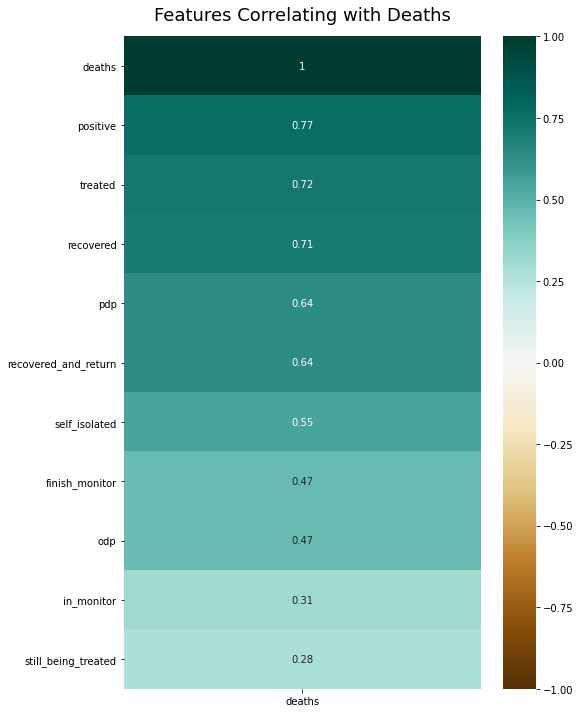

In [ ]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[['deaths']].sort_values(by='deaths', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Deaths', fontdict={'fontsize':18}, pad=16);

From the graphs and data represented above, we can make some conclusions
regarding to COVID-19 cases in Jakarta, June 2020:


*   There are 14842 positive cases
*   District (kecamatan) with most positive cases is TANAH ABANG with 677 cases, and District (kecamatan) with most death cases is TANJUNG PRIOK with 52 cases.
*   Positive cases increase alongside with the increase of people doing self isolation, and being treated in hospital proved with +0,9 and +0,72 correlation value.
*   And death cases are mainly caused by positive cases (+0,77).

**Suggestion:**
From the analytics presented above, we need to focus our treatment to districts (kecamatan) with high positive and death cases, because many positive cases can lead to death (proven by +0,77 correlation value).